# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

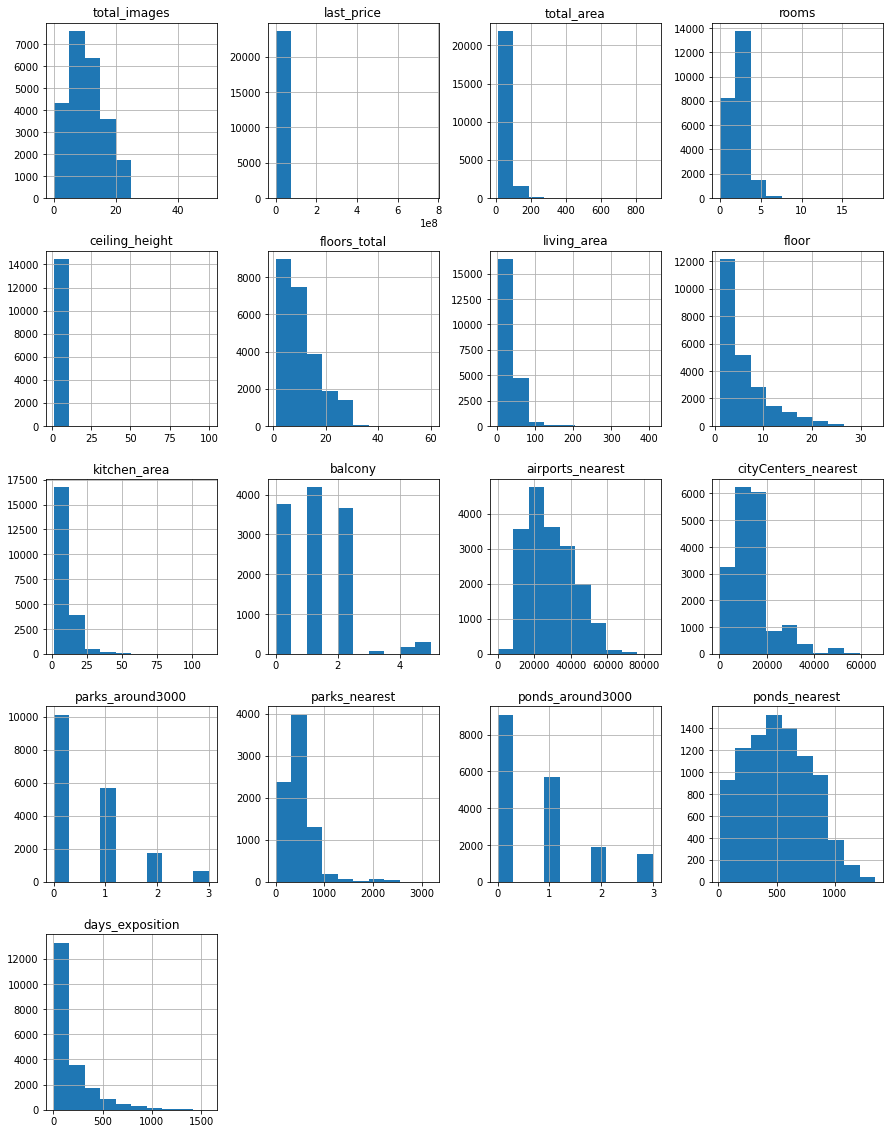

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [6]:
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [7]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


In [8]:
data['balcony']=data['balcony'].fillna(0)
data['days_exposition']=data['days_exposition'].fillna(0)
data['is_apartment']=data['is_apartment'].fillna(False)
data['locality_name']=data['locality_name'].fillna('не определен')
data['floors_total']=data['floors_total'].fillna(data['floor'])
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64


1.колонка balcony была заменена на 0, так как с высокой вероятностью нет балконов в квартирах.
2 days_exposition была заменена на 0, так как с высокой вероятностью эта квартира еще не была продана на момент выгрузки.
3.is_apartment заменен на булевое значение False. так как, вероятно, продавец не указал True в данной графе ссылаясь на то, что это не апартаменты.
4.Floors_total были приравнены к Floor так как здание не может быть без этажей если по квартире указан этаж.
5.locality_name пустоты и нули заменены на 'не определен'.
Причины пропусков могут быть технической сбой, отсутсвтие данных или нежелание указывать продавцом какую либо информацию. 
В остальных столбцах оставили пропуски так как нет адекватной причины заменять их на какое либо другое значение.

In [9]:
data['is_apartment']=data['is_apartment'].astype(bool)
data['balcony']=data['balcony'].astype('int')
data['floors_total']=data['floors_total'].astype('int')
#data['days_exposition'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

is_apartment должно иметь булевое значение.Меняем тип данных на bool.
first_day_exposition меняем формат так как это дата.
balcony,floors_total,days_exposition должны быть целочисленные значения. Меняем на int

In [10]:
sort_data=(data.sort_values('locality_name')) #сортируем и просматриваем уникальные значения наименований населенных пунктов
print(sort_data['locality_name'].unique())
print(sort_data['locality_name'].nunique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [11]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','посёлок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','посёлок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')
print(data['locality_name'].unique())
print(data['locality_name'].nunique())#делаем замену неявных дубликатов

['Санкт-Петербург' 'посёлок Шушары' 'посёлок Янино-1' 'посёлок Парголово'
 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'посёлок Красный Бор' 'Гатчина'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой' 'посёлок Лебяжье'
 'посёлок Сиверский' 'посёлок Молодцово' 'посёлок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'посёлок Романовка' 'посёлок Бугры' 'посёлок Рощино' 'Кириши'
 'Луга' 'Волосово'

Согласно гистограммам были выявлены столбцы с аномальными значениями
ceiling_height,
floors_total,
last_price,
total_area,
rooms


In [12]:
print(data['ceiling_height'].sort_values().unique()) #посмотрим уникальные значения для данного столбца


[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

In [13]:
data=data.replace({'ceiling_height':{20:2,22.6:2.26,24:2.4,25:2.5,26:2.6,27:2.7,27.5:2.75,32:3.2}})
print(data['ceiling_height'].sort_values().unique()) #сделаем замену 

[  1.     1.2    1.75   2.     2.2    2.25   2.26   2.3    2.34   2.4
   2.45   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54
   2.55   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64
   2.65   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74
   2.75   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84
   2.85   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94
   2.95   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04
   3.05   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14
   3.15   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25
   3.26   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35
   3.36   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46
   3.47   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56
   3.57   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68
   3.69   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85
   3.86

In [14]:
print(data['ceiling_height'].isnull().sum()) #посчитали пропущенные значения

9195


Заменим пустые значения средней величиной по столбцу ceiling_height

In [15]:
ceiling_height_avg=data['ceiling_height'].median()

In [16]:
data['ceiling_height']=data['ceiling_height'].fillna(ceiling_height_avg)

In [17]:
print(data['ceiling_height'].isnull().sum())

0


In [18]:
print(data['ceiling_height'].unique())

[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76   2.58   3.7
   2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92   3.11
   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74   2.96
   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54   3.53
   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18   3.35
   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52   3.95
   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24   4.8
   4.5    4.2    3.36   3.08   3.68   3.07   3.37   3.09   8.     3.26
   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22   3.27   4.1
   2.93   3.46   3.47   3.33   3.63   3.32   1.2    8.3    2.98   2.86
   3.17   4.4    3.28   3.04   4.45   5.5    3.84   3.23   3.02   3.21
   3.43   3

AxesSubplot(0.125,0.125;0.775x0.755)


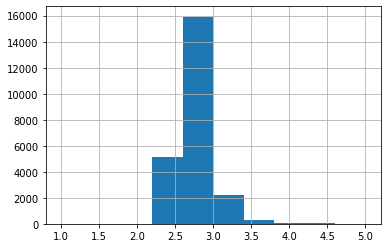

In [19]:
data = data.query('0<ceiling_height<=5') #убираем аномальные значения
print(data['ceiling_height'].hist())

In [20]:
print(data['floors_total'].describe()) #выводим описательную статистику по столбцу 


count    23685.000000
mean        10.672873
std          6.596501
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


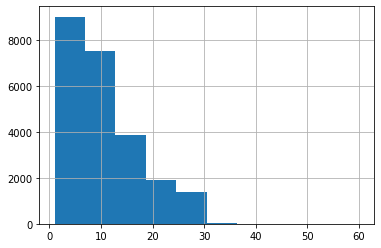

In [21]:
print(data['floors_total'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


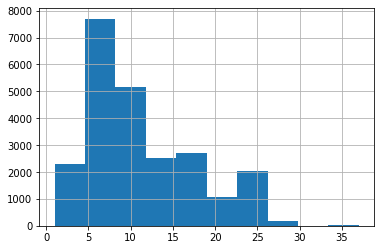

In [22]:
data = data.query('0<floors_total<=37')
print(data['floors_total'].hist())

согласно источнику https://spbhomes.ru/science/samye-vysokie-zdaniya-v-sankt-peterburge/ в городе нет зданий с этажами более 37 Убираем здания, где кол-во этажей  более 37

In [23]:
print(data['last_price'].describe()) #выводим описательную статистику по столбцу 

count    2.368300e+04
mean     6.524765e+06
std      1.080847e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

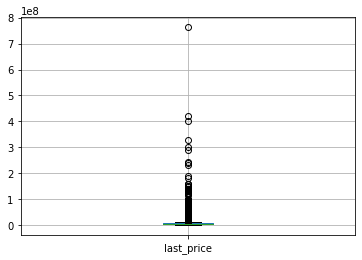

In [24]:
data.boxplot(['last_price'])


Всё, что лежит за границей 3 квартиля считаем выбросом

In [25]:
data.sort_values(by='last_price',ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,0.0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,29.8,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7,NaN,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8,132.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0


AxesSubplot(0.125,0.125;0.775x0.755)


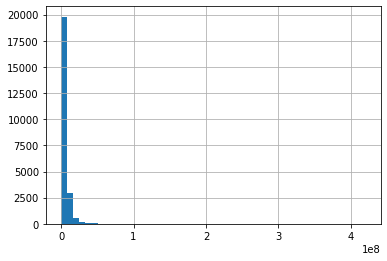

In [26]:
data = data.query('last_price< 7.630000e+08')
print(data['last_price'].hist(bins=50))

In [27]:
data.sort_values(by='last_price',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,0.0


In [28]:
print(data['total_area'].describe())

count    23682.000000
mean        60.297014
std         35.448697
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

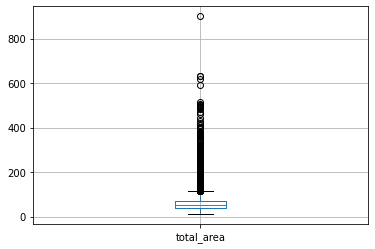

In [29]:
data.boxplot(['total_area'])

Наблюдаем выбросы - все, что за чертой

AxesSubplot(0.125,0.125;0.775x0.755)


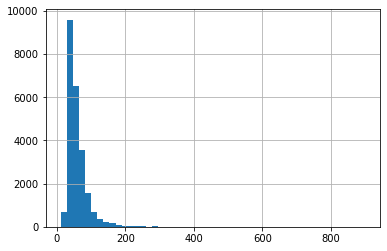

In [30]:
print(data['total_area'].hist(bins=50))

In [31]:
def categorize_total_area(total_area): #создадим категории по столбцу общая площадь
    try:
        if 0 <= total_area <= 15:
            return '0-10'
        elif 16 <= total_area <= 25:
            return '11-25'
        elif 26 <= total_area <= 40:
            return '26-40'
        elif 41 <= total_area <= 60:
            return '41-60'
        elif 61 <= total_area <= 80:
            return '61-80'
        elif 81 <= total_area <= 100:
            return '81-100'
        elif 101 <= total_area <= 125:
            return '101-125'
        elif 126 <= total_area <= 200:
            return '126-200'
        elif 201 <= total_area <= 300:
            return '201-300'
        elif total_area >= 301:
            return '301 и выше'
        
    except:
        pass

In [32]:
data['total_area_category'] = data['total_area'].apply(categorize_total_area)
print(data['total_area_category'].value_counts())

41-60         8866
26-40         5776
61-80         4617
81-100        1837
101-125        859
126-200        701
11-25          225
201-300        164
301 и выше      58
0-10             8
Name: total_area_category, dtype: int64


In [33]:
percentage = pd.DataFrame(data['total_area_category'].value_counts(normalize=True)*100).reset_index()

print(percentage)

        index  total_area_category
0       41-60            38.362684
1       26-40            24.992428
2       61-80            19.977500
3      81-100             7.948596
4     101-125             3.716845
5     126-200             3.033188
6       11-25             0.973562
7     201-300             0.709619
8  301 и выше             0.250963
9        0-10             0.034616


 Оценим в процентом соотношении долю выбросов. Минимальная группа (0-10) и Максимальная группа (301 и выше) занимают 0.03% и 0.25 % соответственно от выборки. Можем убирать данные

AxesSubplot(0.125,0.125;0.775x0.755)


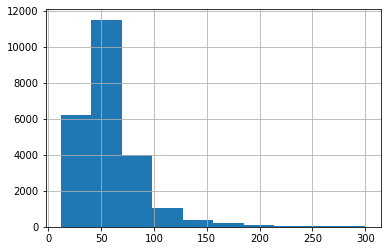

In [34]:
data = data.query('10<total_area<301')
print(data['total_area'].hist())

count    21735.000000
mean        34.025137
std         19.826379
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


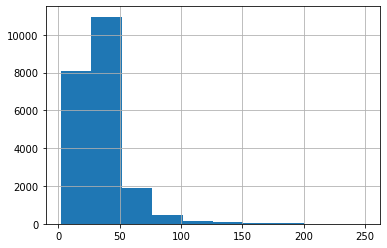

In [35]:
print(data['living_area'].describe())
print(data['living_area'].hist())

Убираем из выборки квартиры с жилой площадью меньше 10кв.м Аномально низкий показатель

AxesSubplot(0.125,0.125;0.775x0.755)


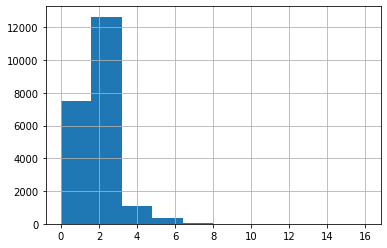

In [36]:
data = data.query('living_area>10')
print(data['rooms'].hist())

In [37]:
print(data['rooms'].describe())

count    21677.000000
mean         2.063431
std          1.047184
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64


In [38]:
percentage_rooms = pd.DataFrame(data['rooms'].value_counts(normalize=True)*100) #посчитаем долю 

print(percentage_rooms)

        rooms
1   33.846935
2   33.611662
3   24.740508
4    5.000692
5    1.287078
0    0.825760
6    0.415187
7    0.189141
8    0.036905
9    0.013840
10   0.013840
11   0.009226
16   0.004613
14   0.004613


Очевидно, что квартир без комнат не бывает. Убираем из выборки квартиры с количеством комнат 0. Они занимают менее 1% от всей выборки.

AxesSubplot(0.125,0.125;0.775x0.755)


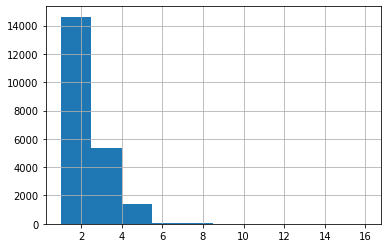

In [39]:
data = data.query('rooms>=1')
print(data['rooms'].hist())

In [40]:
data.info() #проверим кол-во строк после фильтрации данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21498 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21498 non-null  int64         
 1   last_price            21498 non-null  float64       
 2   total_area            21498 non-null  float64       
 3   first_day_exposition  21498 non-null  datetime64[ns]
 4   rooms                 21498 non-null  int64         
 5   ceiling_height        21498 non-null  float64       
 6   floors_total          21498 non-null  int64         
 7   living_area           21498 non-null  float64       
 8   floor                 21498 non-null  int64         
 9   is_apartment          21498 non-null  bool          
 10  studio                21498 non-null  bool          
 11  open_plan             21498 non-null  bool          
 12  kitchen_area          20886 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
data= data.reset_index(drop=True)# сброс индексов в таблице после удаления выбросов

In [42]:
data['price_1']=data['last_price']/data['total_area']
data['price_1']=data['price_1'].astype(int)#цена одного квадратного метра;
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             2  10000000.0      100.00           2018-06-19      2   
4            10   2890000.0       30.40           2018-09-10      1   
5             6   3700000.0       37.30           2017-11-02      1   
6            20   2900000.0       33.16           2018-05-23      1   
7            18   5400000.0       61.00           2017-02-26      3   
8             5   5050000.0       39.60           2017-11-16      1   
9             9   3300000.0       44.00           2018-08-27      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16        51.00      8         False  ...   
1            2.65            11        18.60      1         False  ...

In [43]:
data['weekday'] = data['first_day_exposition'].dt.weekday #день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
print(data['weekday'])

0        3
1        1
2        3
3        1
4        0
        ..
21493    4
21494    1
21495    0
21496    6
21497    4
Name: weekday, Length: 21498, dtype: int64


In [44]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #месяц публикации объявления (1- январь,2- февраль и так далее)
print(data['month'])

0         3
1        12
2         8
3         6
4         9
         ..
21493     8
21494     3
21495     1
21496     2
21497     7
Name: month, Length: 21498, dtype: int64


In [45]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #год публикации объявления 
print(data['year'])

0        2019
1        2018
2        2015
3        2018
4        2018
         ... 
21493    2016
21494    2017
21495    2018
21496    2018
21497    2017
Name: year, Length: 21498, dtype: int64


In [46]:
 def categorize_type_floor(row):  #тип этажа квартиры (значения — «первый», «последний», «другой»);
    floor=row['floor']
    floors_total=row['floors_total']
    if floor==1:
        return 'первый'
    if floor==floors_total:
        return 'последний'
    return 'другой'


data['category_type_floor'] = data.apply(categorize_type_floor,axis=1)

print(data['category_type_floor'].value_counts())


другой       15769
последний     3095
первый        2634
Name: category_type_floor, dtype: int64


In [47]:
data['city_Centers_nearest_dist']=(data['cityCenters_nearest']/1000).round()

print(data['city_Centers_nearest_dist'])#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

0        16.0
1        19.0
2        14.0
3         8.0
4         NaN
         ... 
21493    34.0
21494     4.0
21495     NaN
21496     NaN
21497     NaN
Name: city_Centers_nearest_dist, Length: 21498, dtype: float64


### Проведите исследовательский анализ данных

AxesSubplot(0.125,0.125;0.775x0.755)
0    45.0
dtype: float64


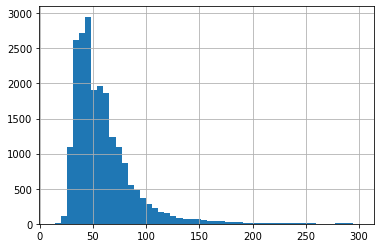

In [48]:
print(data['total_area'].hist(bins=50))
print(data['total_area'].mode())

Чаще всего встречаются квартиры с площадью около 40-45м2

AxesSubplot(0.125,0.125;0.775x0.755)
0    18.0
dtype: float64


count    21498.000000
mean        34.219747
std         19.836996
min         10.080000
25%         18.800000
50%         30.000000
75%         42.400000
max        250.000000
Name: living_area, dtype: float64

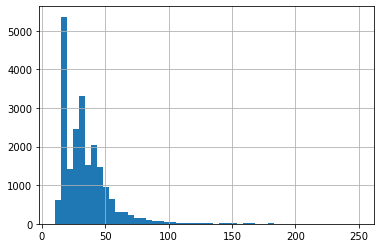

In [49]:
print(data['living_area'].hist(bins=50))
print(data['living_area'].mode())
data['living_area'].describe()

При этом жилая площадь чаще всего встречается с квадратурой равной около 18м2

AxesSubplot(0.125,0.125;0.775x0.755)
0    6.0
dtype: float64


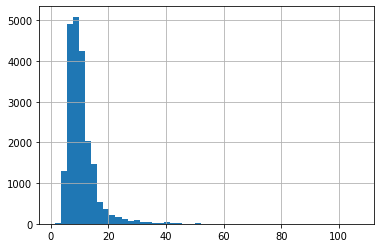

In [50]:
print(data['kitchen_area'].hist(bins=50))
print(data['kitchen_area'].mode())

Чаще всего встречается кухня с квадратурой 6 м2

AxesSubplot(0.125,0.125;0.775x0.755)
0    4500000.0
dtype: float64


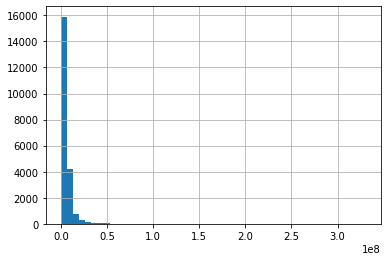

In [51]:
print(data['last_price'].hist(bins=50))
print(data['last_price'].mode())

Чаще всего встречается цена  4500000.0

AxesSubplot(0.125,0.125;0.775x0.755)


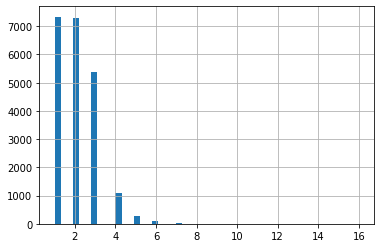

In [52]:
print(data['rooms'].hist(bins=50))

Больше всего 1комнатных квартир. В выборке встречаются и 16комнатные квартиры

AxesSubplot(0.125,0.125;0.775x0.755)


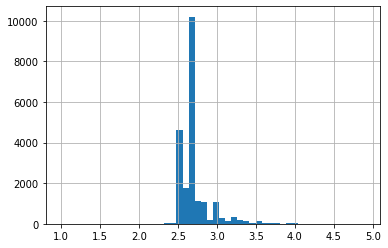

In [53]:
print(data['ceiling_height'].hist(bins=50))

чаще всего встречаются квартиры с потолками 2,7м


AxesSubplot(0.125,0.125;0.775x0.755)
0    2
dtype: int64


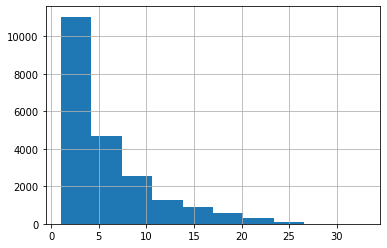

In [54]:
print(data['floor'].hist())
print(data['floor'].mode())

Максимально большое кол-во квартир в выборке с этажами 2-5.Также в выборке присутствуют и высотки 30этажные

AxesSubplot(0.125,0.125;0.775x0.755)


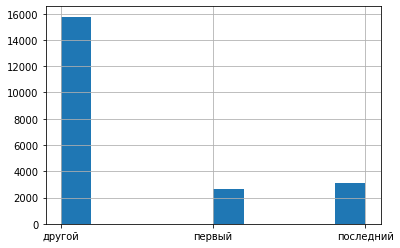

In [55]:
print(data['category_type_floor'].hist())


Более 15тыс раз встречаются квартиры с типом этажа "другой". При этом, "последний" и "первый" практически в одинаковом положении

AxesSubplot(0.125,0.125;0.775x0.755)


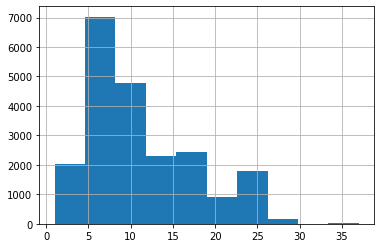

In [56]:
print(data['floors_total'].hist())

Максимально большое кол-во домов в выборке с этажами 5-10 

AxesSubplot(0.125,0.125;0.775x0.755)


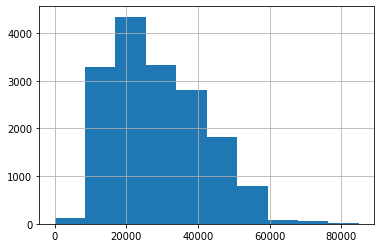

In [57]:
print(data['airports_nearest'].hist())

в выборке более 4000 квартир, которые находятся от аэропорта на расстоянии 20000м

AxesSubplot(0.125,0.125;0.775x0.755)


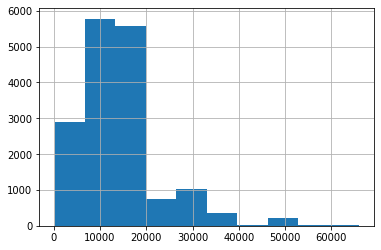

In [58]:
print(data['cityCenters_nearest'].hist())

Более 6000 квартир находятся на расстоянии 20000м от центра

AxesSubplot(0.125,0.125;0.775x0.755)


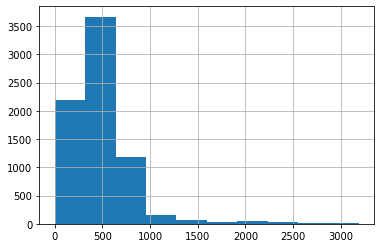

In [59]:
print(data['parks_nearest'].hist())

Более 3500 квартир имеют доступ к паркам на растоянии всего 500м 

AxesSubplot(0.125,0.125;0.775x0.755)


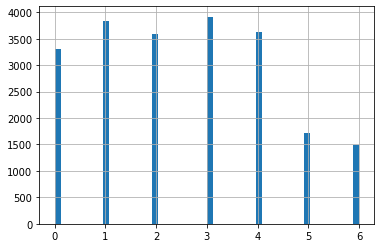

In [60]:
print(data['weekday'].hist(bins=50))

Во вт и в чт чаще всего выставляются объявления. В вс меньше всего активность

AxesSubplot(0.125,0.125;0.775x0.755)


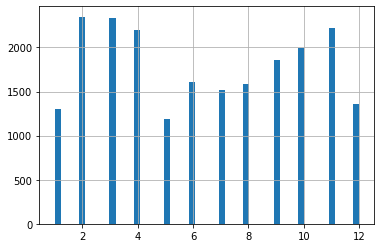

In [61]:
print(data['month'].hist(bins=50))

Февраль и март самый активный месяц, при этом в мае менее 1500 объявлений

In [62]:
data_filter_days=data[data['days_exposition']>0] #убирем нули(бывшие пустые значения) из выборки

AxesSubplot(0.125,0.125;0.775x0.755)
count    18540.000000
mean       185.356958
std        221.505570
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64


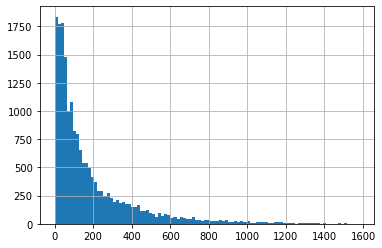

In [63]:
print(data_filter_days['days_exposition'].hist(bins=100))
print(data_filter_days['days_exposition'].describe())


0.6727386751069026


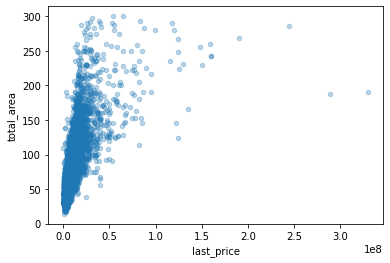

In [64]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3) # зависимость цены от общей площади
print(data['last_price'].corr(data['total_area']))

Корреляция в 0.68 говорит о наличии  связи

0.5866607158805641


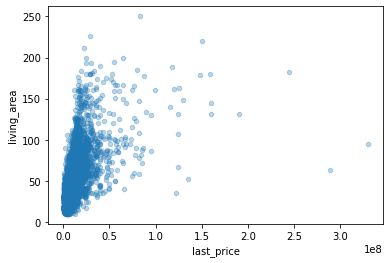

In [65]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3) # зависимость цены от жилой площади
print(data['last_price'].corr(data['living_area']))

Корреляция в 0.58 говорит о наличии связи, однако не слишком сильной.

0.516972110938449


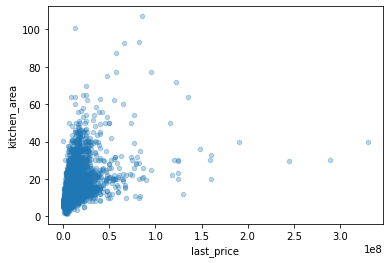

In [66]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3) # зависимость цены от площади кухни
print(data['last_price'].corr(data['kitchen_area']))

 Корреляция в 0.52 говорит о наличии связи ,однако не слишком сильной.

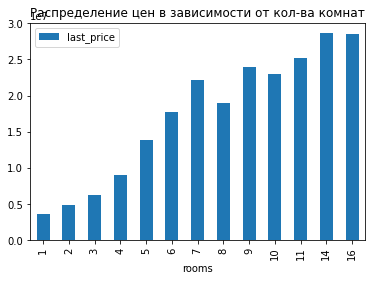

In [67]:
data_grouped_rooms=(
    data
    .pivot_table(index='rooms',values='last_price',aggfunc='median')
    .plot(kind='bar',title='Распределение цен в зависимости от кол-ва комнат')
)
# зависимость цены  числа комнат


В целом,зависимость наблюдается/чем больше комнат тем больше цена. 

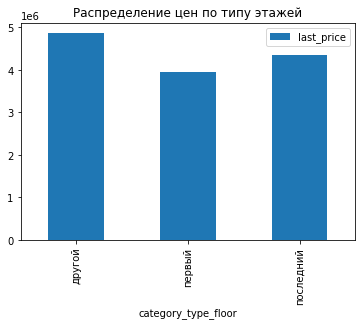

In [68]:
data_grouped_floor=(
    data
    .pivot_table(index='category_type_floor',values='last_price',aggfunc='median')
    .plot(kind='bar',title='Распределение цен по типу этажей')
)
# зависимость цены от типа этажа


Зависимость от типа этажа следующая:
цена будет выше если это не первый и не последний этаж.
При этом последний этаж дороже чем первый

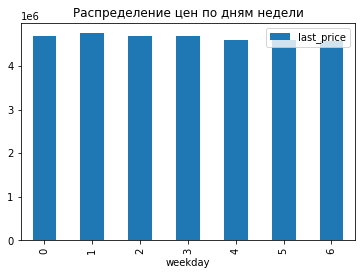

In [69]:
data_grouped_weekday=(
    data
    .pivot_table(index='weekday',values='last_price',aggfunc='median')
    .plot(kind='bar',title='Распределение цен по дням недели')
)
# зависимость цены от дня недели


Не наблюдается зависимость цены от дня недели. 

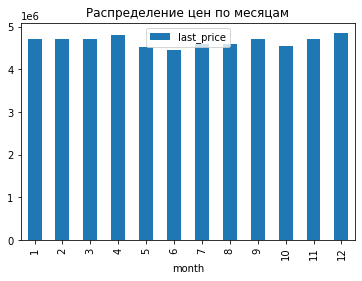

In [70]:
data_grouped_month=(
    data
    .pivot_table(index='month',values='last_price',aggfunc='median')
    .plot(kind='bar',title='Распределение цен по месяцам')
)
# зависимость цены от месяца

Апрельские объявления имеют самые высокие цены

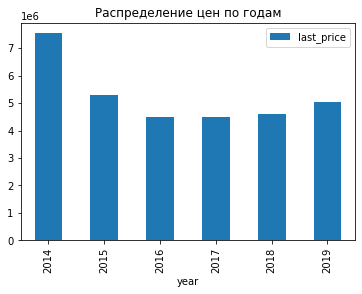

In [71]:
data_grouped_year=(
    data
    .pivot_table(index='year',values='last_price',aggfunc='median')
    .plot(kind='bar',title='Распределение цен по годам')
)
# зависимость цены от года

Линейной зависимости на протяжении с 2014 по 2019 не наблюдается.Линейный рост цен на квартиры начинается с 2017 года

In [72]:
data_grouped_top_10=(
    data
    .pivot_table(index='locality_name',values='studio',aggfunc='count') #создана сводная с данными по населенным пунктам и кол-ву объявлений
    .sort_values(by='studio',ascending=False) #отфильтрованы населенные пункты по убыванию
)
data_grouped_top_10.columns=['count']
display(data_grouped_top_10.head(10)) #выведены на экран топ10 


,count
locality_name,
Санкт-Петербург,14384
посёлок Мурино,464
посёлок Шушары,400
Всеволожск,366
Пушкин,342
Колпино,327
посёлок Парголово,297
Гатчина,292
деревня Кудрово,245


In [73]:
data_median_price_1=(
    data
    .pivot_table(index='locality_name',values='price_1',aggfunc='median')
    .sort_values(by='price_1',ascending=False)    #произведен расчет средней  цены одного квадратного метра во всех населенных пунктах
)
    
print(data_median_price_1.head(10))


                    price_1
locality_name              
посёлок Репино     127678.5
деревня Бор        105539.0
Санкт-Петербург    104251.5
Зеленогорск        101666.5
Кудрово            100000.0
Пушкин             100000.0
Сестрорецк          99526.5
деревня Кудрово     92297.0
посёлок Парголово   92051.0
деревня Мистолово   90229.0


In [74]:
data_grouped_top_10['median_price_1']=data_median_price_1['price_1']#Добавлен столбец средней цены в таблицу data_grouped_top_10 из таблицы data_median_price_1
display(data_grouped_top_10.head(10))

,count,median_price_1
locality_name,,
Санкт-Петербург,14384,104251.5
посёлок Мурино,464,85697.0
посёлок Шушары,400,77312.0
Всеволожск,366,65789.0
Пушкин,342,100000.0
Колпино,327,74722.0
посёлок Парголово,297,92051.0
Гатчина,292,67745.5
деревня Кудрово,245,92297.0


In [75]:
max_median_price_1=data_median_price_1[data_median_price_1['price_1']==data_median_price_1['price_1'].max()]
min_median_price_1=data_median_price_1[data_median_price_1['price_1']==data_median_price_1['price_1'].min()]
print(max_median_price_1) #выведем на экран максимальное среднее значение 
print(min_median_price_1) #выведем на экран минимальное среднее значение 

                 price_1
locality_name           
посёлок Репино  127678.5
                    price_1
locality_name              
деревня Старополье  10368.0


In [76]:
area_in_Spb=data.query('locality_name=="Санкт-Петербург"') #выделим квартиры в Санкт-Петербурге



-0.3207324449857438


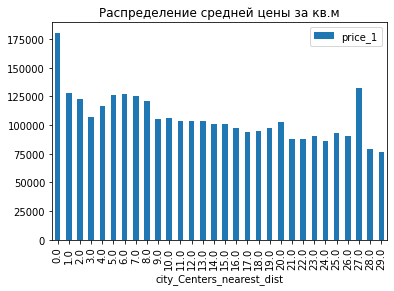

In [77]:
data_grouped_Spb=(
    area_in_Spb
    .pivot_table(index='city_Centers_nearest_dist',values='price_1',aggfunc='median')
    .plot(kind='bar',title='Распределение средней цены за кв.м')
)
print(area_in_Spb['city_Centers_nearest_dist'].corr(area_in_Spb['price_1']))

Отрицательная корреляция и график говорит о том , что с ростом показателя city_Centers_nearest_dist (км) уменьшается показтель цены.
Чем ближе к центру тем дороже цена.

### Общий вывод

В ходе предобработки данных были выявлены:
1. Аномальные значения(в столбцах ceiling_height,floors_total,last_price,total_area,living_area,rooms). 2201 (9% от общей выборки) строк аномальных значений были удалены из выборки. 
2. Неявные дубликаты. Из столбца locality_name были удалены 42 строки 
3. Пропуски. Были проделаны операции по заменен пустот средними показателями (ceiling_height),а также замены пустот на нули и булевые значения в других колонках.
Причины пропусков могут быть технической сбой, отсутсвтие данных или нежелание указывать продавцом какую либо информацию. 
В ходе  исследовательского анализа данных было выявлено:
1. Чаще всего встречаются квартиры с площадью около 40-45м2
2. Чаще встречаются квартиры с жилой площадью около 18м2  и 6м2 кухня
3. Большая часть выборки это квартиры 5этажных зданий
4. 12% от всей выборки - это квартиры первого этажа
5. Больше всего представлено 1 и 2х комнатных квартир
6. Территориально большая часть продаваемых квартир расположены в радиусе 30 км от центра
7. Февраль и март самый активный месяц, при этом в мае менее 1500 объявлений
8. В вс меньше всего публикаций
9. Быстрой продажей можно считать показатель продажу в течении 45 дней и меньше.
10. Самая долгая продажа 1580 дней или более 4 лет.

Выявлены следующие зависимости:
1. Чем больше площадь квартиры тем выше цена
2. Чем больше комнат тем выше цена 
3. Wена будет выше если это не первый и не последний этаж. При этом последний этаж дороже чем первый
4. Не наблюдается зависимость цены от дня недели.
5. Апрельские объявления самые высокие в цене
6. Минимальная средняя цена за м2 10 368.0
7. Максимальная средняя цена за м2 127 678.5
8. Чем ближе в г.Санкт-Петербурге квартира к центру тем дороже ее цена.


